In [1]:
%load_ext autoreload
%autoreload 2
import os

while not os.path.exists("pyproject.toml"):
    os.chdir("..")
print(f"Changed working directory to {os.getcwd()}")

import scanpy as sc
import matplotlib.pyplot as plt
import nichepca as npc

from spatial_tcr.spatial import annotate_ccs, merge_labels

Changed working directory to /epyc/projects/dschaub/analysis-projects/spatial-tcr


In [2]:
path = "data/processed/01-kidney_tcr_qc.h5ad"
adata = sc.read_h5ad(path)
adata

AnnData object with n_obs × n_vars = 510407 × 480
    obs: 'sample', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'slide', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'condition'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    obsm: 'spatial'
    layers: 'counts'

In [3]:
npc.gc.construct_multi_sample_graph(
    adata, sample_key="sample", radius=75, remove_self_loops=True
)

  0%|          | 0/13 [00:00<?, ?it/s]

----------- Graph Stats -----------
Number of nodes: 510407
Number of edges: 60517326
Average in-degree: 118.5667953491211
Average out-degree: 118.5667953491211
Contains self-loops: False
Is undirected: True


In [4]:
adata

AnnData object with n_obs × n_vars = 510407 × 480
    obs: 'sample', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'slide', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'condition'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'graph'
    obsm: 'spatial'
    layers: 'counts'

In [5]:
annotate_ccs(adata)

/tmp/ipykernel_1382136/3151081305.py:3: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(ad_sub, color="cc", spot_size=10)


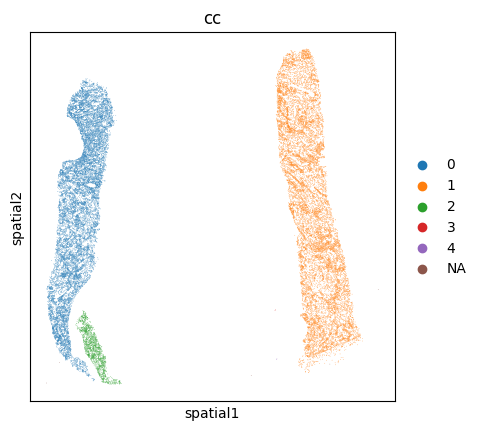

In [6]:
for s in adata.obs["sample"].unique():
    ad_sub = adata[adata.obs["sample"] == s].copy()
    sc.pl.spatial(ad_sub, color="cc", spot_size=10)
    break

<Axes: xlabel='cc'>

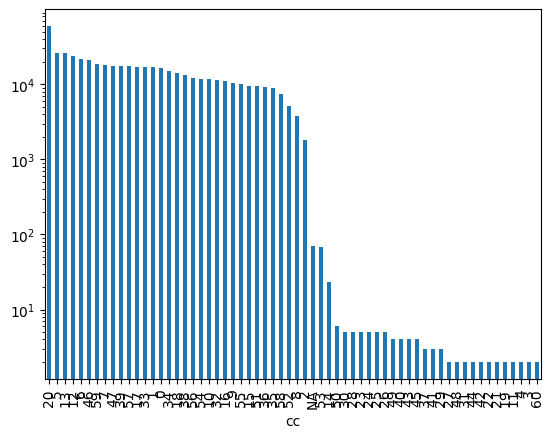

In [7]:
adata.obs.cc.value_counts().plot(kind="bar", logy=True)

## Merge clusters if necessary

/tmp/ipykernel_1382136/2968809745.py:4: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(ad_sub, color="cc", spot_size=10)


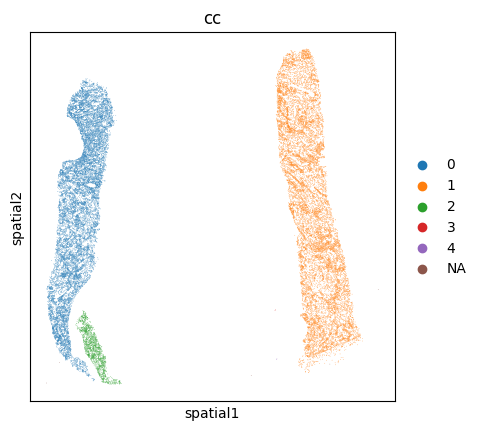

In [8]:
samples = adata.obs["sample"].unique().tolist()
for s in samples[0::]:
    ad_sub = adata[adata.obs["sample"] == s].copy()
    sc.pl.spatial(ad_sub, color="cc", spot_size=10)
    break

In [9]:
merge_labels(adata, labels=["0", "2"], label_key="cc")

/tmp/ipykernel_1382136/3418574497.py:4: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(ad_sub, color="cc", spot_size=10)


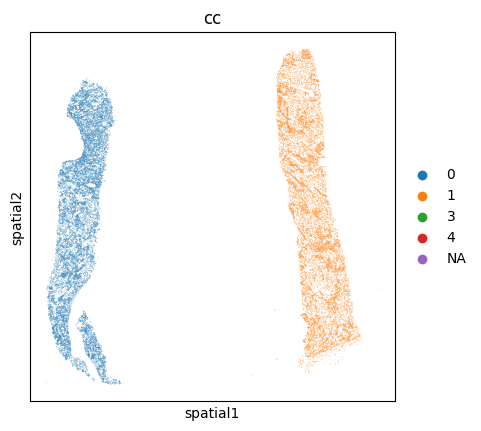

In [10]:
samples = adata.obs["sample"].unique().tolist()
for s in samples[0:1]:
    ad_sub = adata[adata.obs["sample"] == s].copy()
    sc.pl.spatial(ad_sub, color="cc", spot_size=10)
    break

In [11]:
adata = adata[adata.obs["cc"] != "NA"].copy()

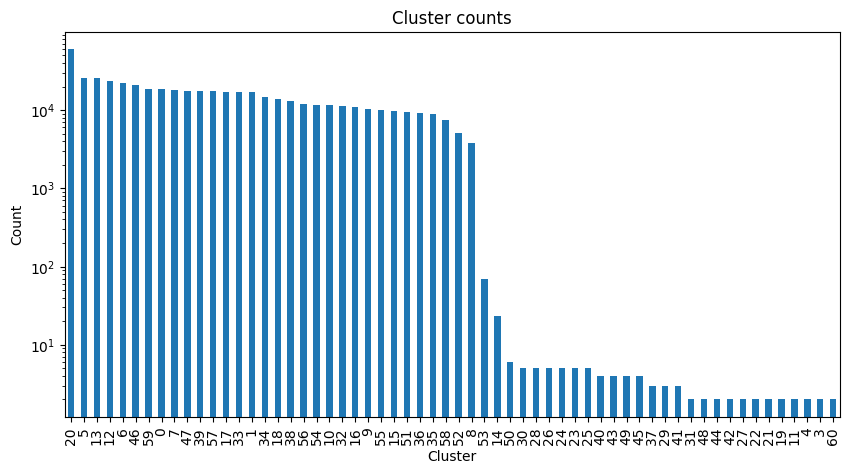

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
adata.obs.cc.value_counts().plot(kind="bar", logy=True, ax=ax)
ax.set_title("Cluster counts")
ax.set_xlabel("Cluster")
ax.set_ylabel("Count")
plt.show()

/tmp/ipykernel_1382136/2721364821.py:7: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(ad_sub, color="cc", spot_size=10)


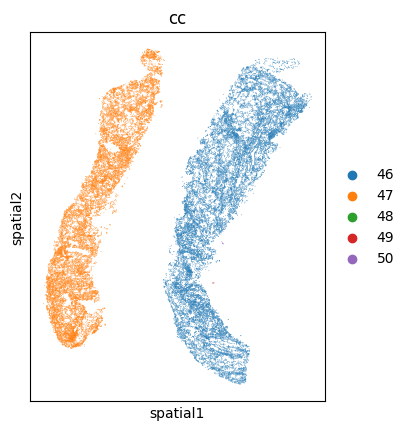

In [13]:
def cc_to_sample(adata, cc):
    return adata.obs.loc[adata.obs["cc"] == cc, "sample"].iloc[0]


s = cc_to_sample(adata, "47")
ad_sub = adata[adata.obs["sample"] == s].copy()
sc.pl.spatial(ad_sub, color="cc", spot_size=10)

In [14]:
min_size = 1000
mask = adata.obs.cc.value_counts() > min_size
retained_ccs = mask[mask].index.tolist()
adata = adata[adata.obs["cc"].isin(retained_ccs)].copy()

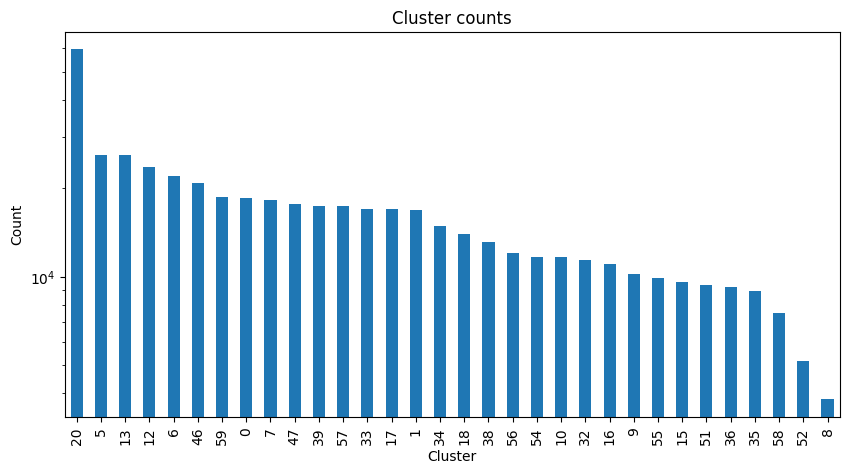

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
adata.obs.cc.value_counts().plot(kind="bar", logy=True, ax=ax)
ax.set_title("Cluster counts")
ax.set_xlabel("Cluster")
ax.set_ylabel("Count")
plt.show()

/tmp/ipykernel_1382136/243057988.py:4: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(ad_sub, color="cc", spot_size=10)


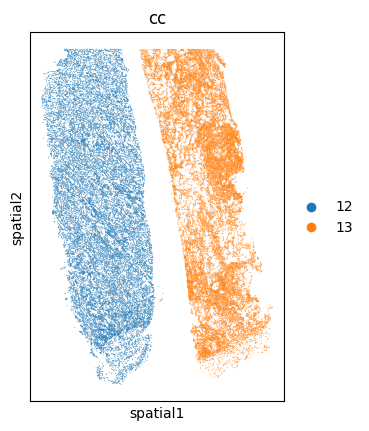

/tmp/ipykernel_1382136/243057988.py:4: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(ad_sub, color="cc", spot_size=10)


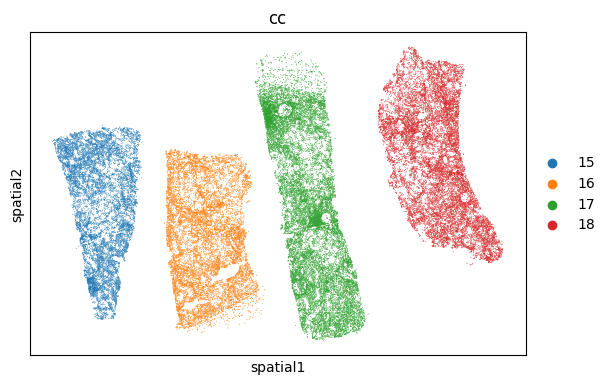

In [16]:
samples = adata.obs["sample"].unique().tolist()
for s in samples[4:6]:
    ad_sub = adata[adata.obs["sample"] == s].copy()
    sc.pl.spatial(ad_sub, color="cc", spot_size=10)

In [17]:
adata

AnnData object with n_obs × n_vars = 510159 × 480
    obs: 'sample', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'slide', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'condition', 'cc'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'graph'
    obsm: 'spatial'
    layers: 'counts'

In [18]:
adata.write_h5ad("data/processed/02-kidney_tcr_split.h5ad")